# BraTS, 3D MRI segmentation using U-Net

## Data exploration, visualize segmentation masks

In [129]:
import os
BASE_IMG_PATH = '../data/Task01_BrainTumour/imagesTr/'
BASE_MASK_PATH = '../data/Task01_BrainTumour/labelsTr/'

In [130]:
# Append .. to path
import sys
sys.path.append('..')

In [131]:
!ls $BASE_IMG_PATH

BRATS_001.nii.gz  BRATS_122.nii.gz  BRATS_243.nii.gz  BRATS_364.nii.gz
BRATS_002.nii.gz  BRATS_123.nii.gz  BRATS_244.nii.gz  BRATS_365.nii.gz
BRATS_003.nii.gz  BRATS_124.nii.gz  BRATS_245.nii.gz  BRATS_366.nii.gz
BRATS_004.nii.gz  BRATS_125.nii.gz  BRATS_246.nii.gz  BRATS_367.nii.gz
BRATS_005.nii.gz  BRATS_126.nii.gz  BRATS_247.nii.gz  BRATS_368.nii.gz
BRATS_006.nii.gz  BRATS_127.nii.gz  BRATS_248.nii.gz  BRATS_369.nii.gz
BRATS_007.nii.gz  BRATS_128.nii.gz  BRATS_249.nii.gz  BRATS_370.nii.gz
BRATS_008.nii.gz  BRATS_129.nii.gz  BRATS_250.nii.gz  BRATS_371.nii.gz
BRATS_009.nii.gz  BRATS_130.nii.gz  BRATS_251.nii.gz  BRATS_372.nii.gz
BRATS_010.nii.gz  BRATS_131.nii.gz  BRATS_252.nii.gz  BRATS_373.nii.gz
BRATS_011.nii.gz  BRATS_132.nii.gz  BRATS_253.nii.gz  BRATS_374.nii.gz
BRATS_012.nii.gz  BRATS_133.nii.gz  BRATS_254.nii.gz  BRATS_375.nii.gz
BRATS_013.nii.gz  BRATS_134.nii.gz  BRATS_255.nii.gz  BRATS_376.nii.gz
BRATS_014.nii.gz  BRATS_135.nii.gz  BRATS_256.nii.gz  BRATS_377.nii.gz
BRATS_

In [132]:
!ls $BASE_MASK_PATH

BRATS_001.nii.gz  BRATS_122.nii.gz  BRATS_243.nii.gz  BRATS_364.nii.gz
BRATS_002.nii.gz  BRATS_123.nii.gz  BRATS_244.nii.gz  BRATS_365.nii.gz
BRATS_003.nii.gz  BRATS_124.nii.gz  BRATS_245.nii.gz  BRATS_366.nii.gz
BRATS_004.nii.gz  BRATS_125.nii.gz  BRATS_246.nii.gz  BRATS_367.nii.gz
BRATS_005.nii.gz  BRATS_126.nii.gz  BRATS_247.nii.gz  BRATS_368.nii.gz
BRATS_006.nii.gz  BRATS_127.nii.gz  BRATS_248.nii.gz  BRATS_369.nii.gz
BRATS_007.nii.gz  BRATS_128.nii.gz  BRATS_249.nii.gz  BRATS_370.nii.gz
BRATS_008.nii.gz  BRATS_129.nii.gz  BRATS_250.nii.gz  BRATS_371.nii.gz
BRATS_009.nii.gz  BRATS_130.nii.gz  BRATS_251.nii.gz  BRATS_372.nii.gz
BRATS_010.nii.gz  BRATS_131.nii.gz  BRATS_252.nii.gz  BRATS_373.nii.gz
BRATS_011.nii.gz  BRATS_132.nii.gz  BRATS_253.nii.gz  BRATS_374.nii.gz
BRATS_012.nii.gz  BRATS_133.nii.gz  BRATS_254.nii.gz  BRATS_375.nii.gz
BRATS_013.nii.gz  BRATS_134.nii.gz  BRATS_255.nii.gz  BRATS_376.nii.gz
BRATS_014.nii.gz  BRATS_135.nii.gz  BRATS_256.nii.gz  BRATS_377.nii.gz
BRATS_

In [133]:
import glob

In [134]:
all_img_paths = glob.glob(os.path.join(BASE_IMG_PATH,'*'))
# sort by filename
all_img_paths = sorted(all_img_paths, key=lambda x: int(os.path.basename(x).split('.')[0][6:]))
all_mask_paths = glob.glob(os.path.join(BASE_MASK_PATH,'*'))
# sort by filename
all_mask_paths = sorted(all_mask_paths, key=lambda x: int(os.path.basename(x).split('.')[0][6:]))

In [135]:
all_img_paths[:10], all_mask_paths[:10]

(['../data/Task01_BrainTumour/imagesTr/BRATS_001.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_002.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_003.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_004.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_005.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_006.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_007.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_008.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_009.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_010.nii.gz'],
 ['../data/Task01_BrainTumour/labelsTr/BRATS_001.nii.gz',
  '../data/Task01_BrainTumour/labelsTr/BRATS_002.nii.gz',
  '../data/Task01_BrainTumour/labelsTr/BRATS_003.nii.gz',
  '../data/Task01_BrainTumour/labelsTr/BRATS_004.nii.gz',
  '../data/Task01_BrainTumour/labelsTr/BRATS_005.nii.gz',
  '../data/Task01_BrainTumour/labelsTr/BRATS_006.nii.gz',
  '../data/Task01_BrainTumour/labelsTr/BRATS_007.nii.gz',
  '../data/Ta

In [136]:
all_img_paths[0], all_mask_paths[0]

('../data/Task01_BrainTumour/imagesTr/BRATS_001.nii.gz',
 '../data/Task01_BrainTumour/labelsTr/BRATS_001.nii.gz')

In [137]:
import numpy as np

In [ ]:
from src import preprocess

In [342]:
test_img = preprocess.load_stacked_mri_img(all_img_paths[0])
test_images = preprocess.split_mri_img(test_img)
test_mask = preprocess.load_mask(all_mask_paths[0])

In [237]:
slice_idx = 90

In [238]:
import matplotlib.pyplot as plt

In [239]:
from src import constants
from src import viz

<module 'src.constants' from '/home/nashir/Documents/UCF/spring2023/cap5516/assignment-2/notebooks/../src/constants.py'>

In [245]:
dims = test_images[0].shape
sagittal_mid = dims[0] // 2
coronal_mid = dims[1] // 2
axial_mid = dims[2] // 2
sagittal_mid, coronal_mid, axial_mid

Perspective 1, midpoint of sagittal plane


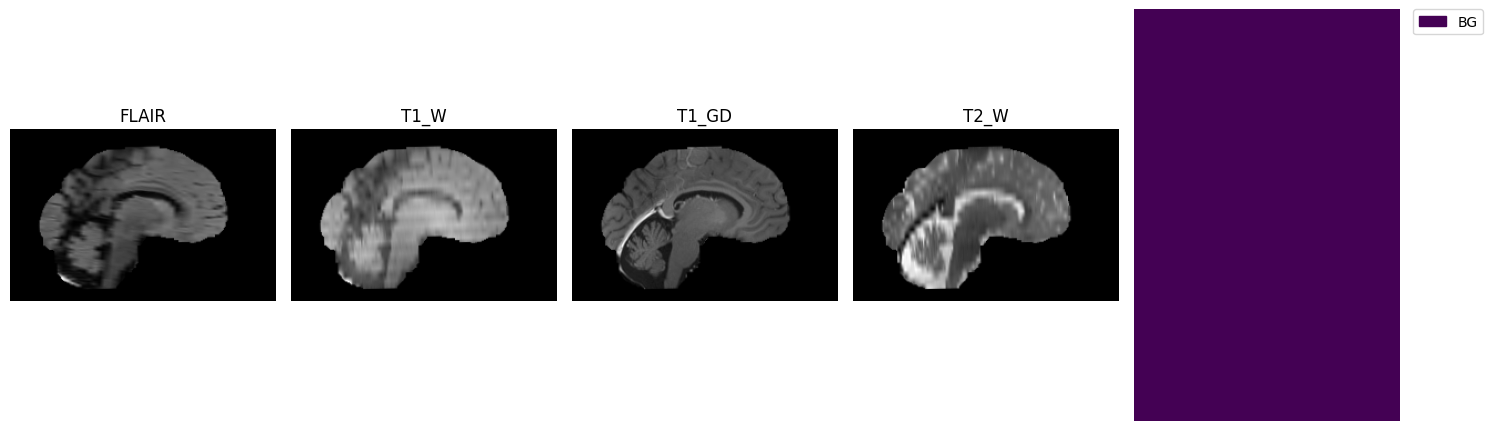

Perspective 2, midpoint of coronal plane


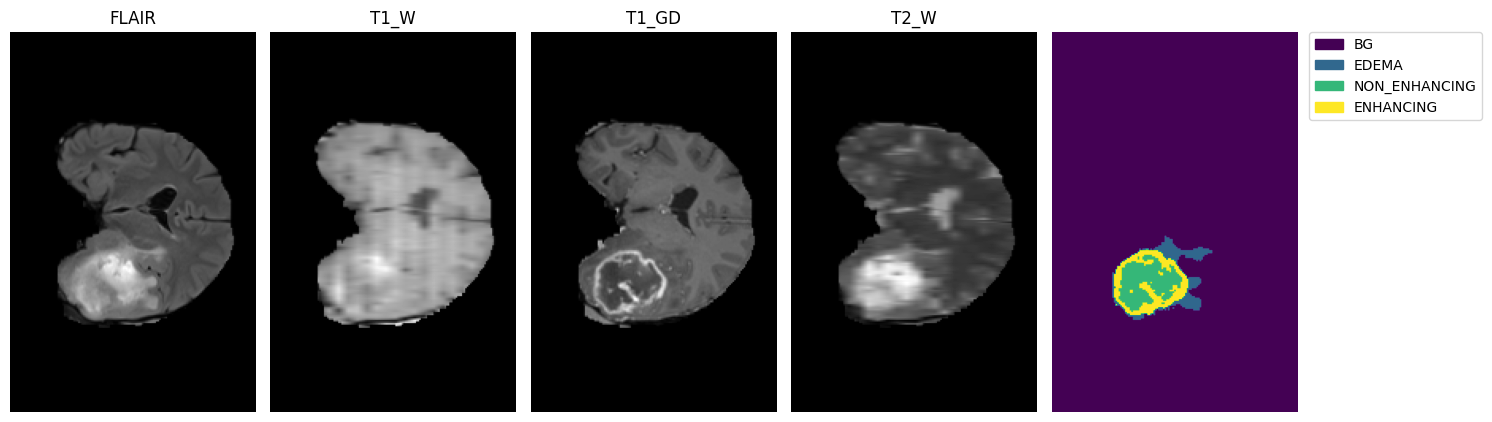

Perspective 3, midpoint of axial plane


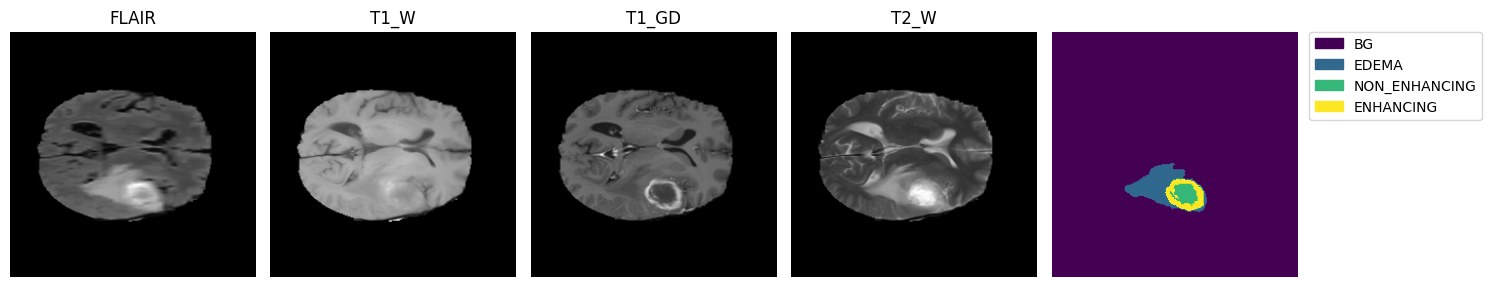

In [255]:
print("Perspective 1, midpoint of sagittal plane")
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
for i, img in enumerate(test_images):
    ax[i].set_title(constants.IMG_TYPES[i])
    ax[i].imshow(np.rot90(img[sagittal_mid, :, :]), cmap='gray')
    ax[i].axis('off')

viz.show_mask(test_mask[sagittal_mid, :, :], ax[-1])

plt.tight_layout()
plt.show()

print("Perspective 2, midpoint of coronal plane")
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
for i, img in enumerate(test_images):
    ax[i].set_title(constants.IMG_TYPES[i])
    ax[i].imshow(img[:, coronal_mid, :], cmap='gray')
    ax[i].axis('off')

viz.show_mask(test_mask[:, coronal_mid, :], ax[-1])

plt.tight_layout()
plt.show()

print("Perspective 3, midpoint of axial plane")
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
for i, img in enumerate(test_images):
    ax[i].set_title(constants.IMG_TYPES[i])
    ax[i].imshow(img[:, :, axial_mid], cmap='gray')
    ax[i].axis('off')

viz.show_mask(test_mask[:, :, axial_mid], ax[-1])

plt.tight_layout()
plt.show()

In [351]:
from src import preprocess

In [348]:
aggregate_masks = preprocess.get_masks(test_mask)

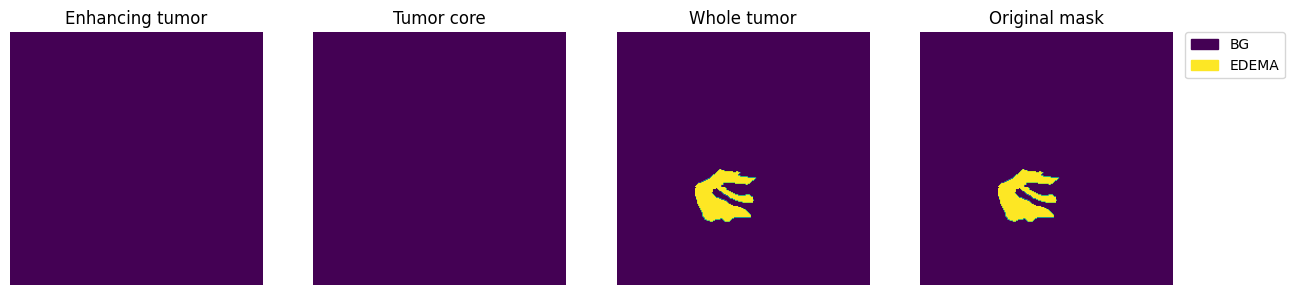

In [349]:
slice_idx = 90

viz.show_aggregate_masks(aggregate_masks, slice_idx, test_mask)

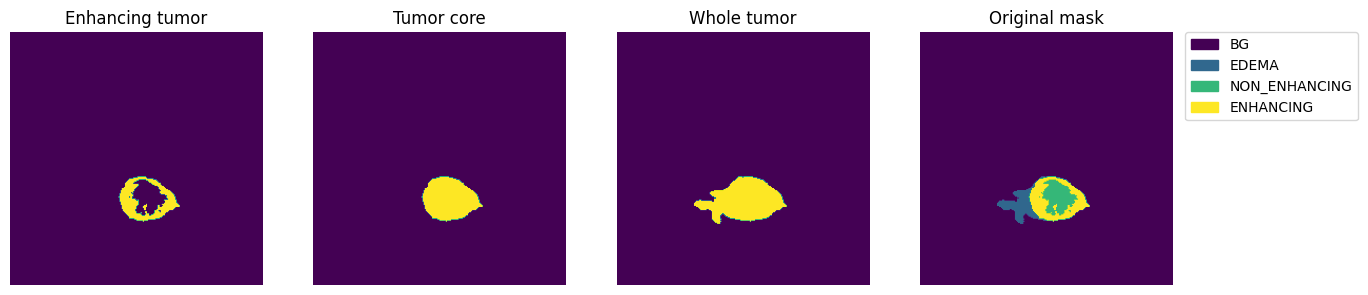

In [350]:
slice_idx = 60

viz.show_aggregate_masks(aggregate_masks, slice_idx, test_mask)

In [313]:
flair = test_images[constants.FLAIR]
t1_w = test_images[constants.T1_W]
t1_gd = test_images[constants.T1_GD]
t2_w = test_images[constants.T2_W]

Showing slice 60 without mask


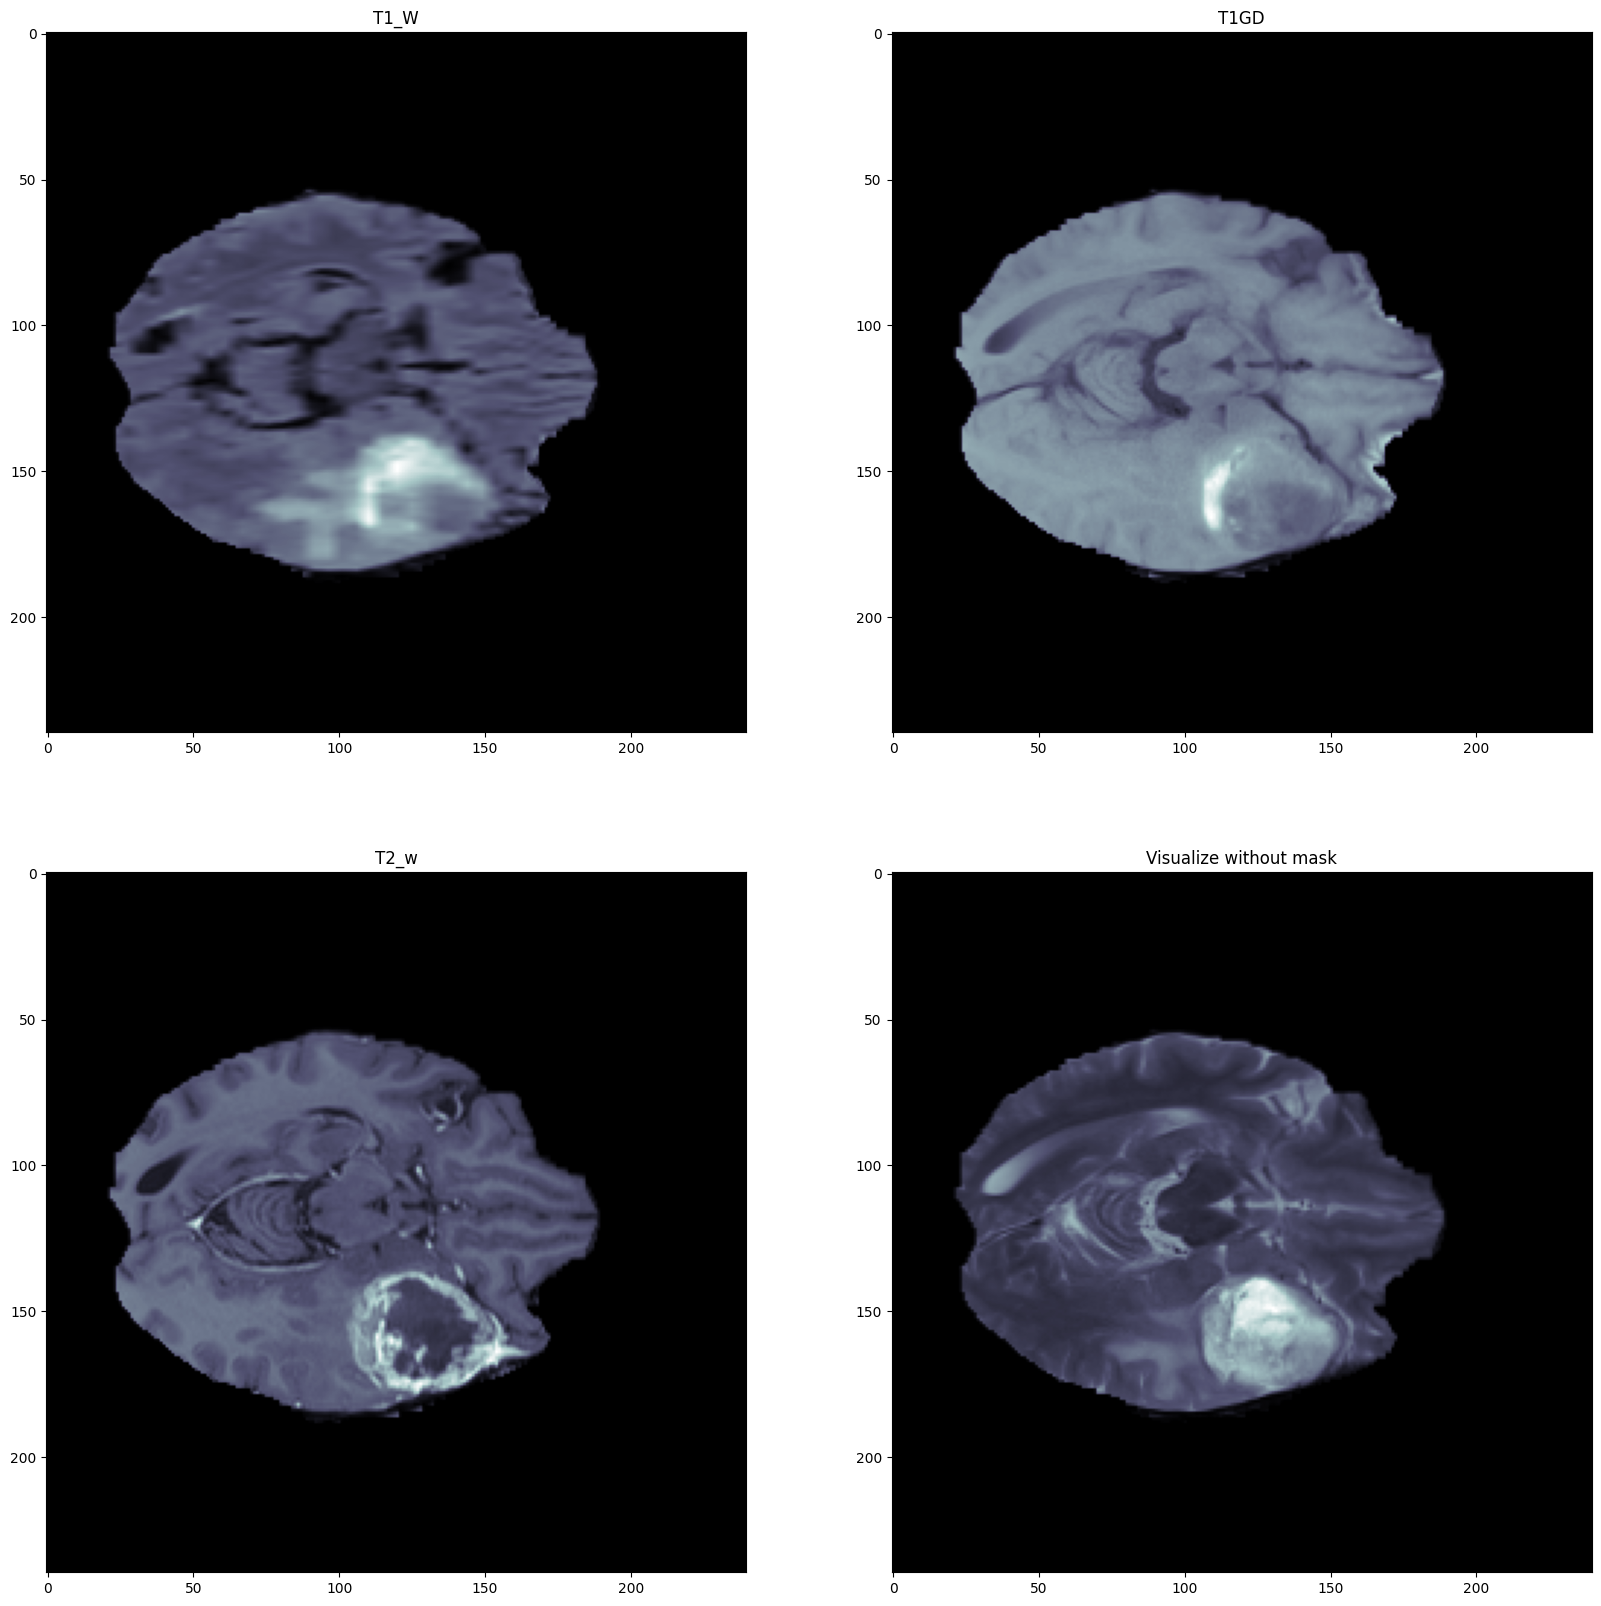

In [314]:
print(f"Showing slice {slice_idx} without mask")

fig, ax = plt.subplots(2, 2, figsize = (20, 20))

ax[1, 1].imshow(t2_w[:,:,slice_idx], cmap ='bone')
ax[1, 1].set_title('FLAIR')
ax[0, 0].imshow(flair[:, :, slice_idx], cmap ='bone')
ax[0, 0].set_title('T1_W')
ax[0, 1].imshow(t1_w[:, :, slice_idx], cmap ='bone')
ax[0, 1].set_title('T1GD')
ax[1, 0].imshow(t1_gd[: ,:,slice_idx], cmap ='bone')
ax[1, 0].set_title('T2_w')
plt.title("Visualize without mask")
plt.show()

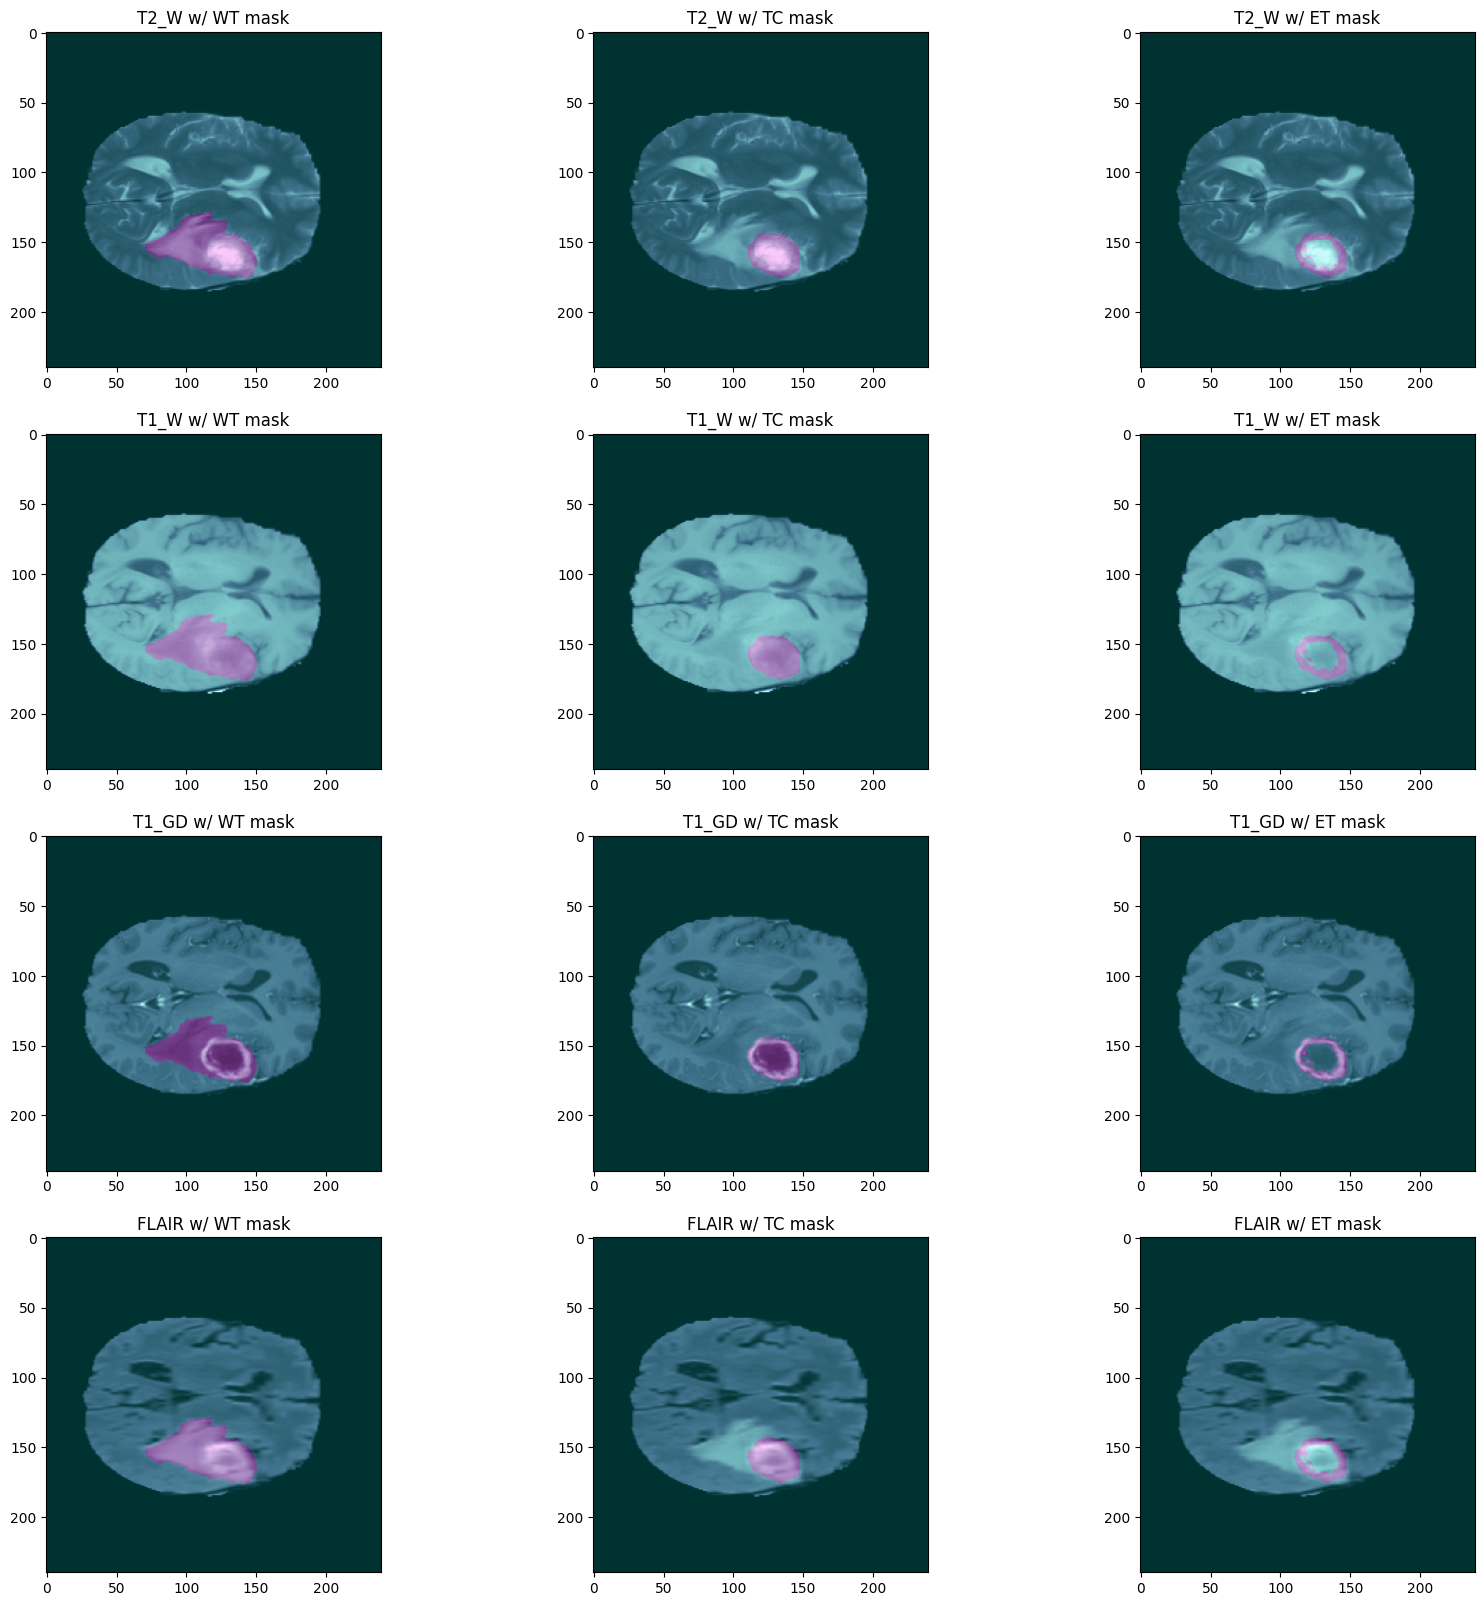

In [352]:
fig, ax = plt.subplots(4, 3, figsize = (20, 20))
ax[0, 0].imshow(t2_w[:, :, axial_mid], cmap ='bone')
ax[0, 0].imshow(aggregate_masks[constants.WT, :, :, axial_mid], cmap ='cool', alpha = 0.2)
ax[0, 0].set_title('T2_W w/ WT mask')

ax[0, 1].imshow(t2_w[:, :, axial_mid], cmap ='bone')
ax[0, 1].imshow(aggregate_masks[constants.TC, :, :, axial_mid], cmap ='cool', alpha = 0.2)
ax[0, 1].set_title('T2_W w/ TC mask')

ax[0, 2].imshow(t2_w[:, :, axial_mid], cmap ='bone')
ax[0, 2].imshow(aggregate_masks[constants.ET, :, :, axial_mid], cmap ='cool', alpha = 0.2)
ax[0, 2].set_title('T2_W w/ ET mask')

ax[1, 0].imshow(t1_w[:, :, axial_mid], cmap ='bone')
ax[1, 0].imshow(aggregate_masks[constants.WT, :, :, axial_mid], cmap ='cool', alpha = 0.2)
ax[1, 0].set_title('T1_W w/ WT mask')

ax[1, 1].imshow(t1_w[:, :, axial_mid], cmap ='bone')
ax[1, 1].imshow(aggregate_masks[constants.TC, :, :, axial_mid], cmap ='cool', alpha = 0.2)
ax[1, 1].set_title('T1_W w/ TC mask')

ax[1, 2].imshow(t1_w[:, :, axial_mid], cmap ='bone')
ax[1, 2].imshow(aggregate_masks[constants.ET, :, :, axial_mid], cmap ='cool', alpha = 0.2)
ax[1, 2].set_title('T1_W w/ ET mask')

ax[2, 0].imshow(t1_gd[:, :, axial_mid], cmap ='bone')
ax[2, 0].imshow(aggregate_masks[constants.WT, :, :, axial_mid], cmap ='cool', alpha = 0.2)
ax[2, 0].set_title('T1_GD w/ WT mask')

ax[2, 1].imshow(t1_gd[:, :, axial_mid], cmap ='bone')
ax[2, 1].imshow(aggregate_masks[constants.TC, :, :, axial_mid], cmap ='cool', alpha = 0.2)
ax[2, 1].set_title('T1_GD w/ TC mask')

ax[2, 2].imshow(t1_gd[:, :, axial_mid], cmap ='bone')
ax[2, 2].imshow(aggregate_masks[constants.ET, :, :, axial_mid], cmap ='cool', alpha = 0.2)
ax[2, 2].set_title('T1_GD w/ ET mask')

ax[3, 0].imshow(flair[:, :, axial_mid], cmap ='bone')
ax[3, 0].imshow(aggregate_masks[constants.WT, :, :, axial_mid], cmap ='cool', alpha = 0.2)
ax[3, 0].set_title('FLAIR w/ WT mask')

ax[3, 1].imshow(flair[:, :, axial_mid], cmap ='bone')
ax[3, 1].imshow(aggregate_masks[constants.TC, :, :, axial_mid], cmap ='cool', alpha = 0.2)
ax[3, 1].set_title('FLAIR w/ TC mask')

ax[3, 2].imshow(flair[:, :, axial_mid], cmap ='bone')
ax[3, 2].imshow(aggregate_masks[constants.ET, :, :, axial_mid], cmap ='cool', alpha = 0.2)
ax[3, 2].set_title('FLAIR w/ ET mask')

plt.show()

## Data preparation
Create a pytorch dataset from the training images, can then pass the dataloader to the five fold evaluation

# Evaluation

Use a table to list the segmentation results (Dice score and Hausdorff Dist.) for each fold, as well as the average
results of 5-fold.

Evaluation:
background (label 0), necrotic and non-enhancing tumor (label 1), peritumoral edema (label 2) and GD-enhancing
tumor (label 4). The segmentation accuracy is measured by the Dice score and the Hausdorff distance (95%) metrics
for enhancing tumor region (ET, label 4), regions of the tumor core (TC, labels 1 and 4), and the whole tumor region
(WT, labels 1,2 and 4).
4) Present a few examples of your segmentation results (an example is given below) for qualitative analysis.

## TODO: show side by side of method vs ground truth for a few slices. Show failure cases.

## TODO (low priority): Make a gif traveling along axis showing successive slices and output segmentation mask